### Source of Dataset

Kaggle: [Anemia Types Classification](https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification)

### Import Essential Libraries

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [3]:
# load the dataset
data = pd.read_csv('../data/diagnosed_cbc_data_v4.csv')

# check the dimension of the dataset
numrow, numcol = data.shape
print('The dataset contains {} rows and {} columns.'.format(numrow, numcol))

# check the attributes in the dataset
attributes = data.columns.values
print('Attributes in the dataset:', attributes)

# display the first 5 rows of the dataset
display(data.head(n=5))

The dataset contains 1281 rows and 15 columns.
Attributes in the dataset: ['WBC' 'LYMp' 'NEUTp' 'LYMn' 'NEUTn' 'RBC' 'HGB' 'HCT' 'MCV' 'MCH' 'MCHC'
 'PLT' 'PDW' 'PCT' 'Diagnosis']


,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


### Attributes Description

- WBC: The count of white blood cells, vital for immune response.
- LYMp:
- NEUTp:
- LYMn:
- NEUTn:
- RBC: The count of red blood cells, responsible for oxygen transport.
- HGB: The amount of hemoglobin in the blood, crucial for oxygen transport.
- HCT: 
- MCV (Mean Corpuscular Volume): Average volume of a single red blood cell.
- MCH (Mean Corpuscular Hemoglobin): Average amount of hemoglobin per red blood cell.
- MCHC (Mean Corpuscular Hemoglobin Concentration): Average concentration of hemoglobin in red blood cells.
- PLT: The number of platelets in the blood, involved in blood clotting.
- PDW: a measurement of the variability in platelet size distribution in the blood
- PCT: A procalcitonin test can help your health care provider diagnose if you have sepsis from a bacterial infection or if you have a high risk of developing sepsis
- Diagnosis: Anemia type based on the CBC parameters

In [4]:
# summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [6]:
# check the number of duplicate records and missing value in each attributes
print('Number of duplicate records in the dataset:', data.duplicated().sum())
print('Number of missing value in each attributes:')
print(data.isna().sum())

Number of duplicate records in the dataset: 49
Number of missing value in each attributes:
WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64


### Data Splitting

In [76]:
# data splitting
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, stratify=data['Diagnosis'], shuffle=True, random_state=122)

# check the dimension of the train and test dataset
print('Dimension of the training dataset:', train.shape)
print('Dimension of the test dataset:', test.shape)

Dimension of the training dataset: (1024, 15)
Dimension of the test dataset: (257, 15)


In [77]:
# segregate the feature matrix and target vector from train and test dataset
Xtrain = train.drop(columns=['Diagnosis'], axis=1)
ytrain = train['Diagnosis']

Xtest = test.drop(columns=['Diagnosis'], axis=1)
ytest = test['Diagnosis']

### Exploratory Data Analysis

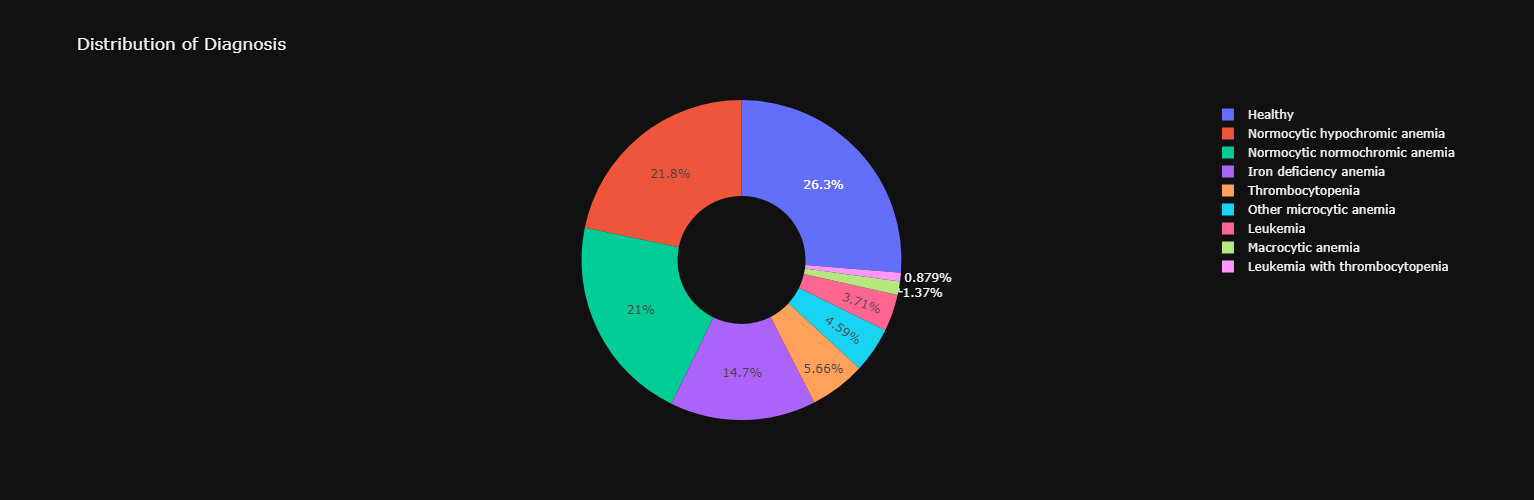

In [15]:
# class distribution of target variable
target = ytrain.value_counts()
target_df = pd.DataFrame(target).reset_index()
target_df.columns = ['Diagnosis', 'Count']


fig = px.pie(data_frame=target_df, values='Count', names='Diagnosis', 
             hole=0.4,
             width=800, height=500, 
             template='plotly_dark', 
             title='Distribution of Diagnosis')
fig.show()

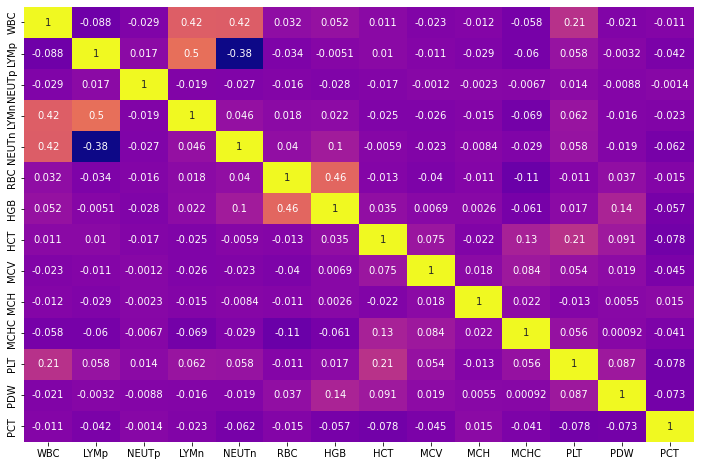

In [18]:
# correlation between features
correlation = Xtrain.corr(method='pearson')

# visualize the correlation in heatmap
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(correlation, cmap='plasma', cbar=False, annot=True)
plt.show()

In [24]:
# relationship of each attribute with the target variable
def plot_box(predictor):
    fig = px.box(data_frame=train, y=predictor, 
                 color='Diagnosis', 
                 width=800, height=500, 
                 template='plotly_dark', 
                 title=f'Distribution of {predictor} by Diagnosis')
    fig.update_layout(
        xaxis = dict(
            title = 'Diagnosis'
        ),
        yaxis = dict(
            title = predictor
        )
    )
    fig.show()

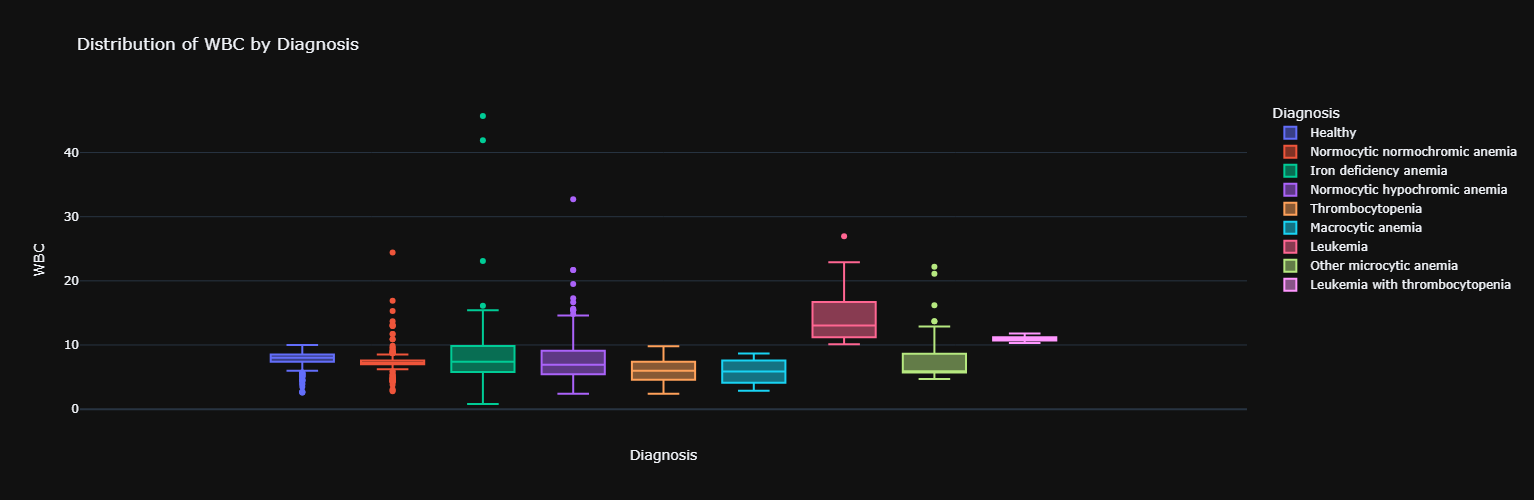

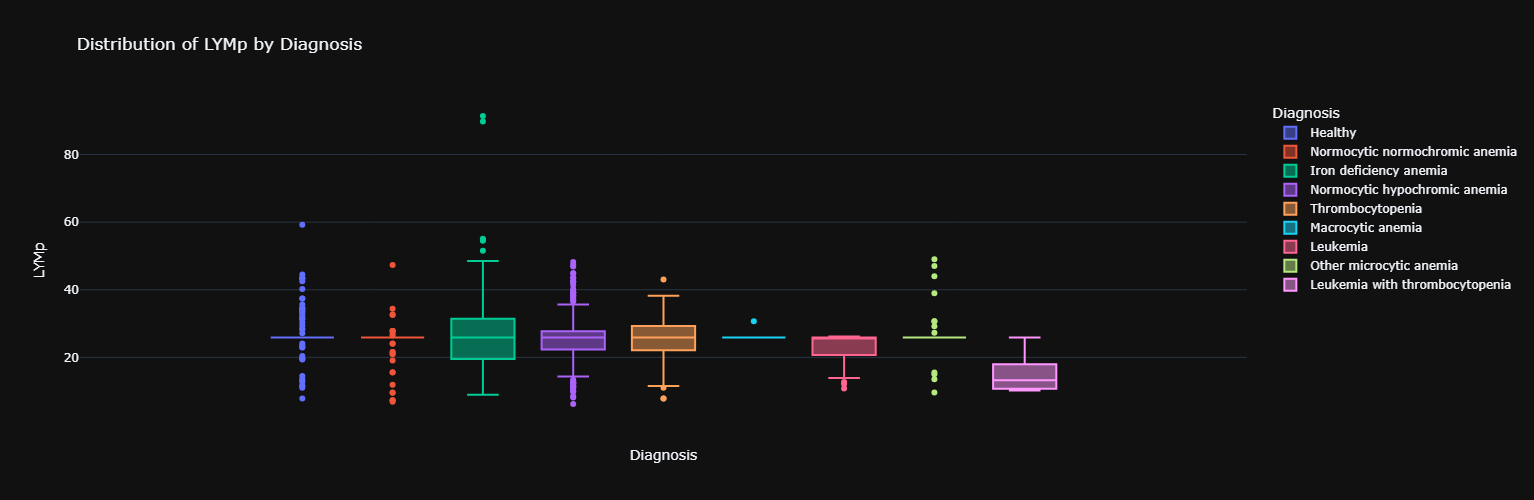

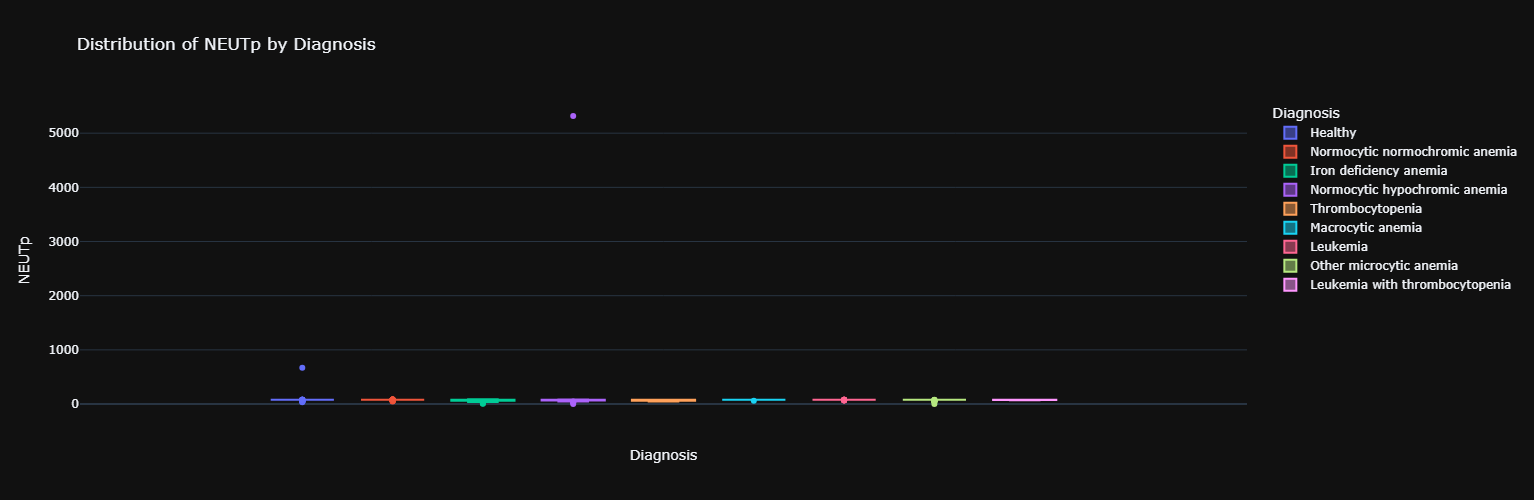

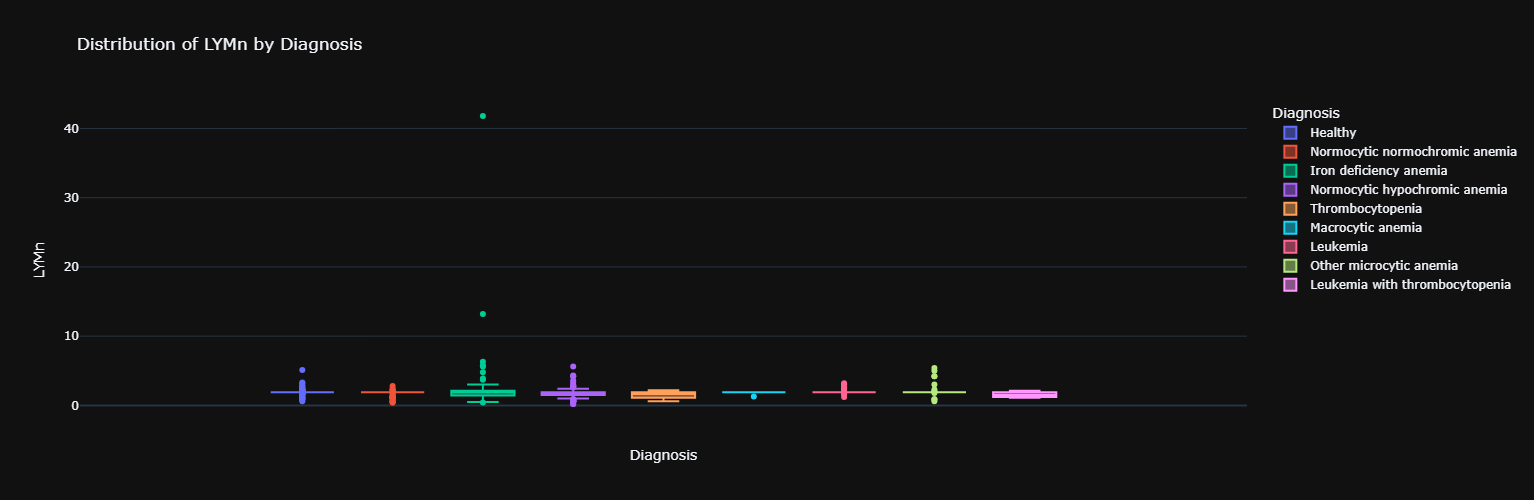

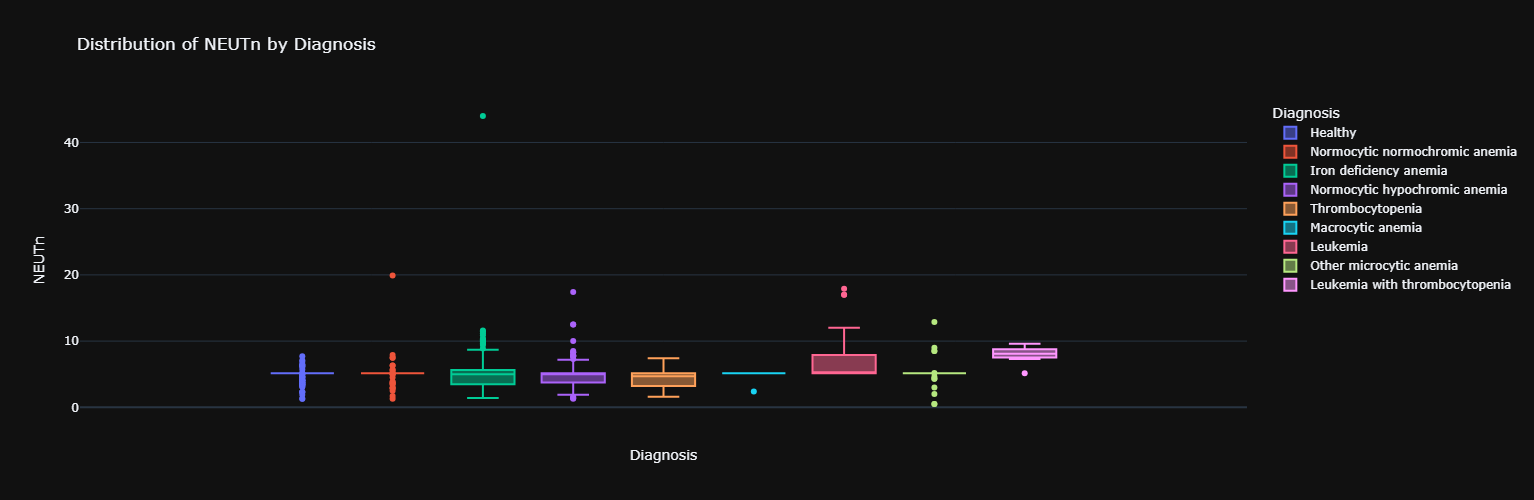

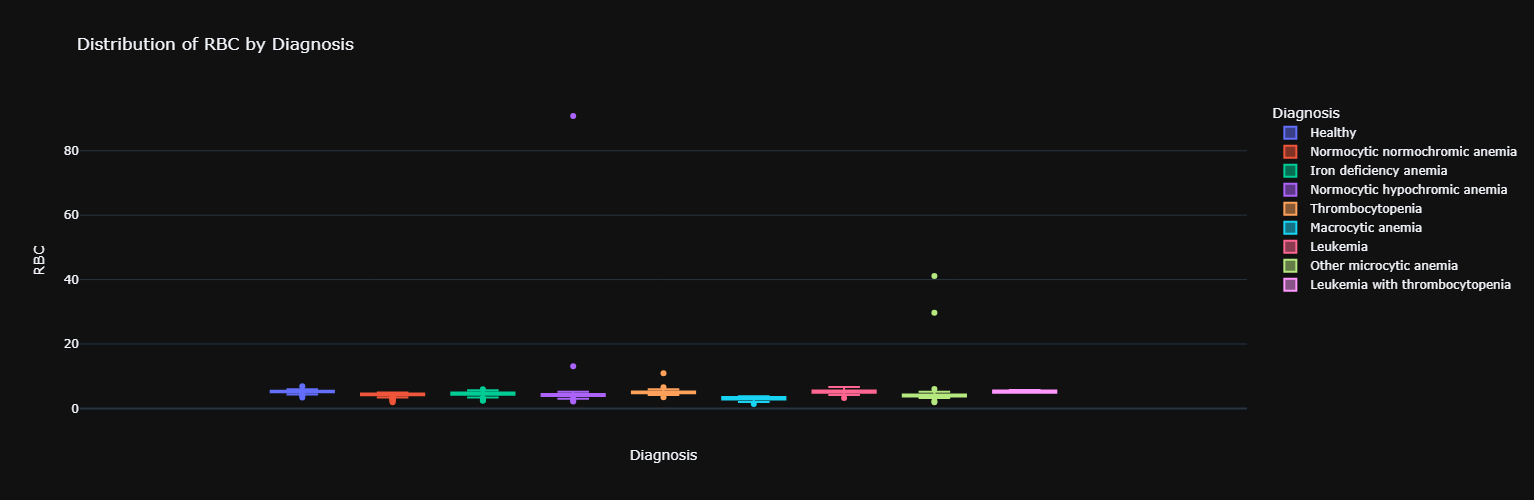

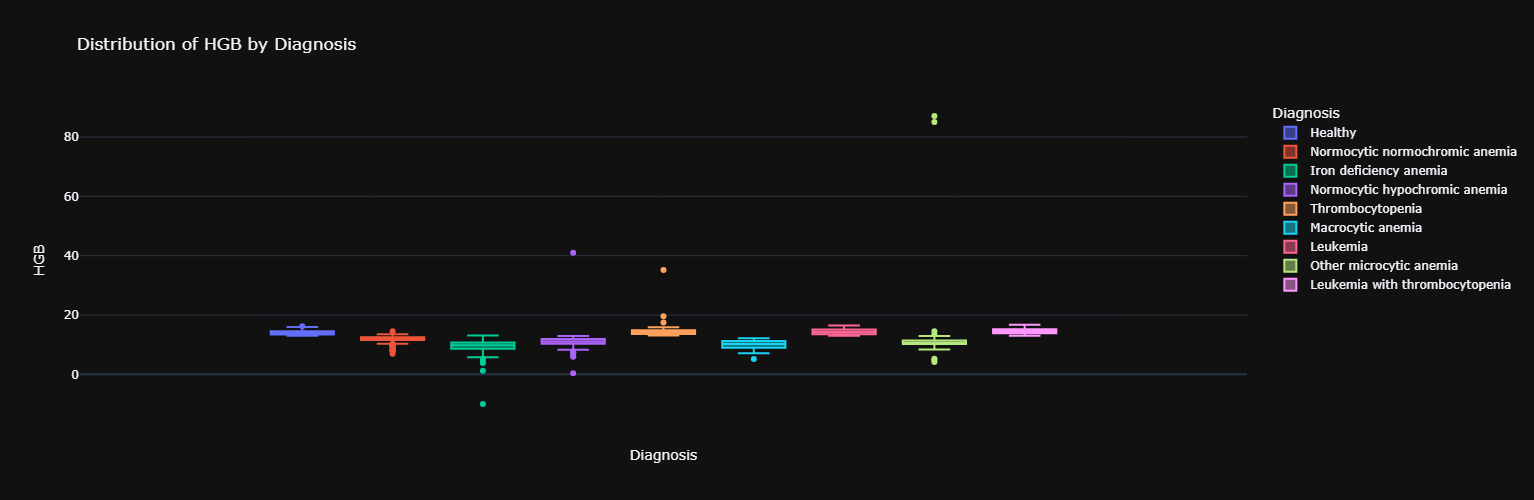

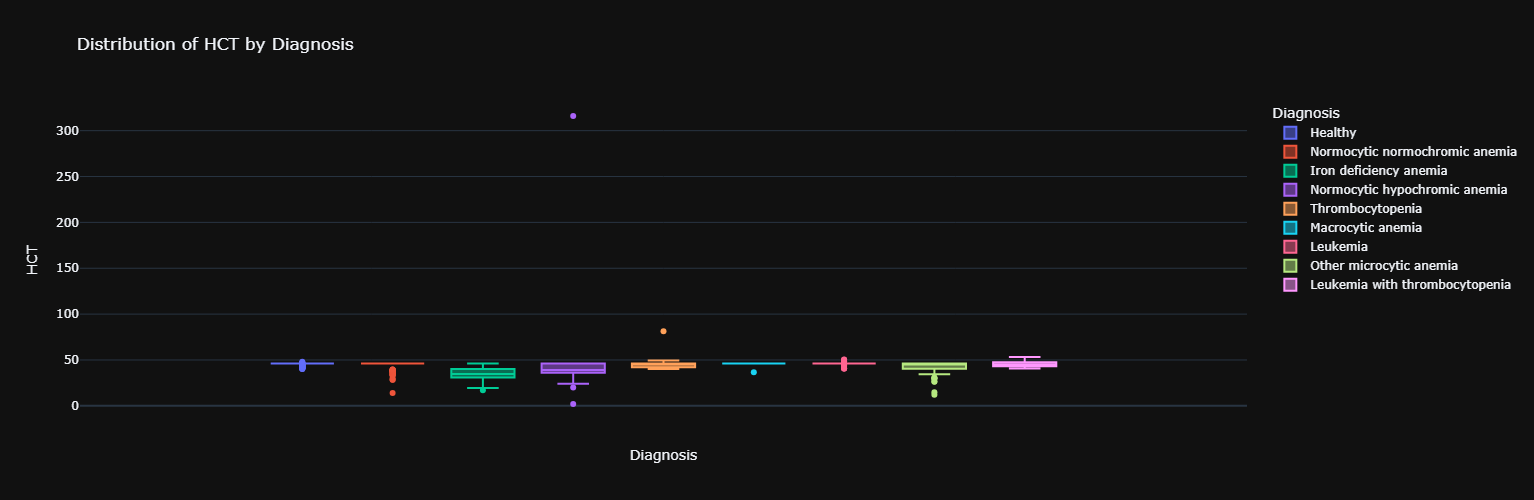

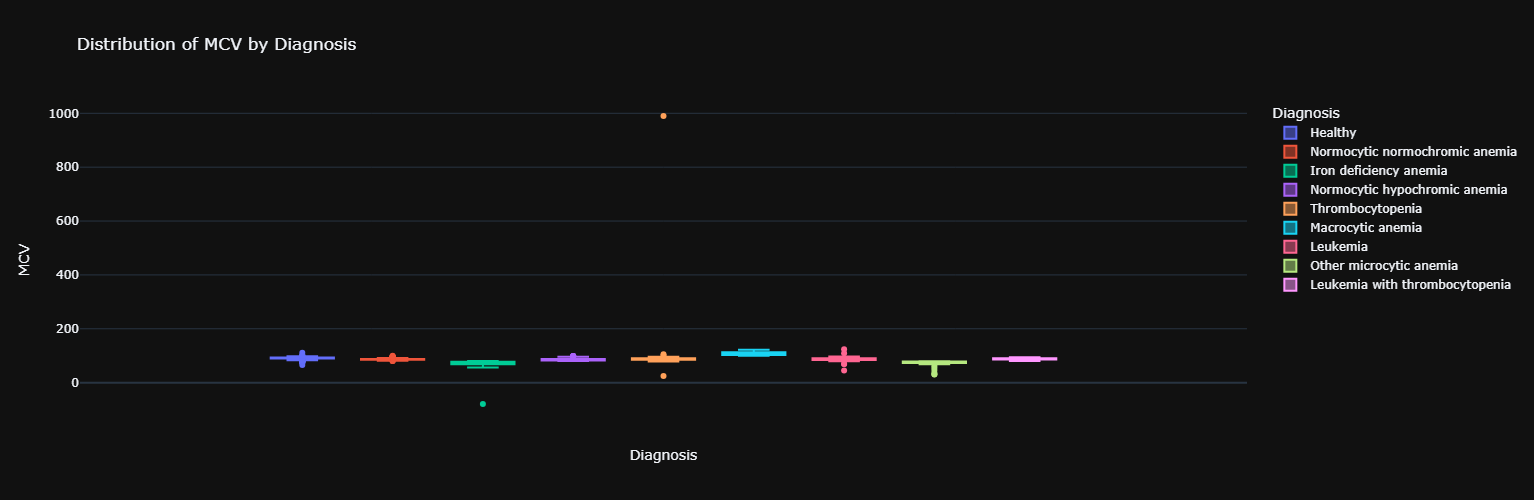

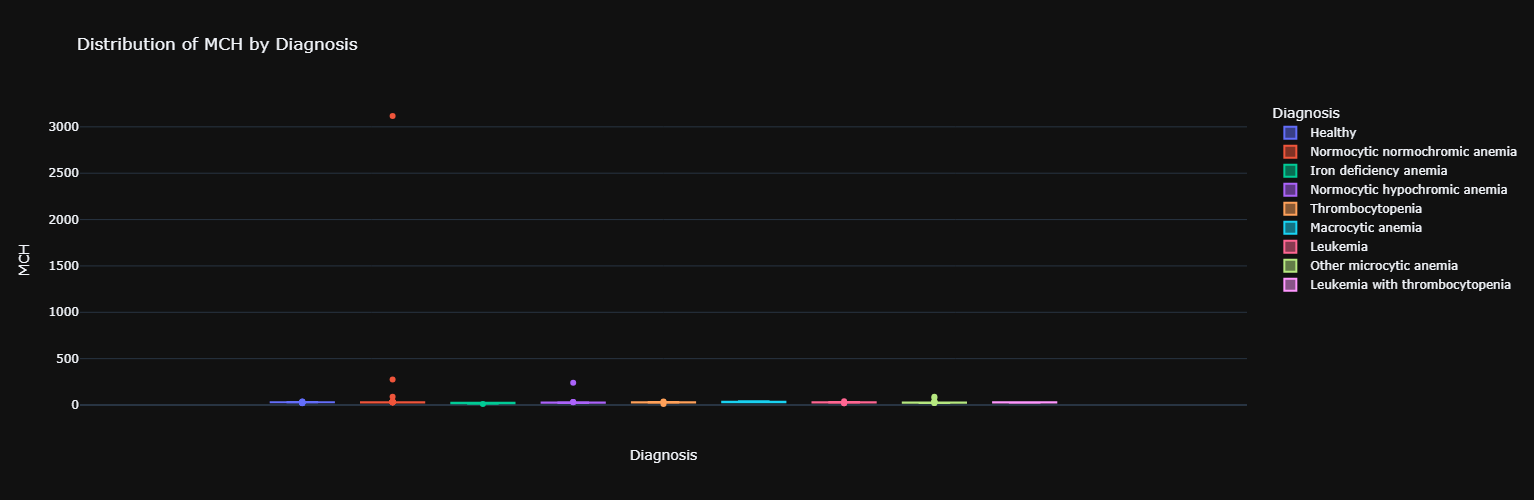

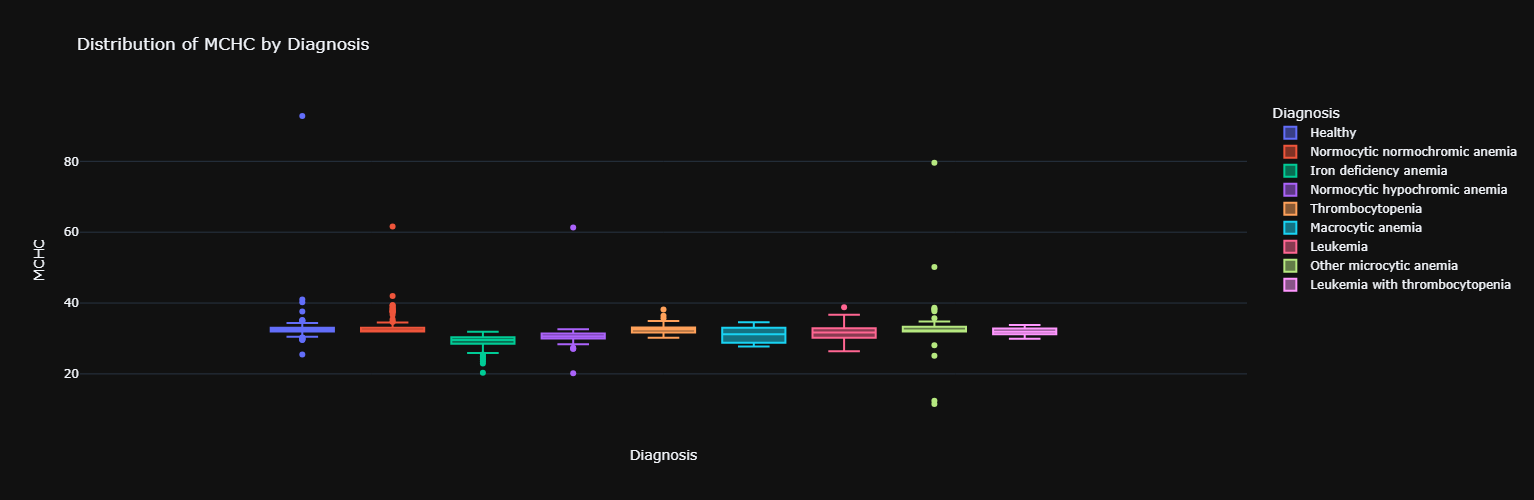

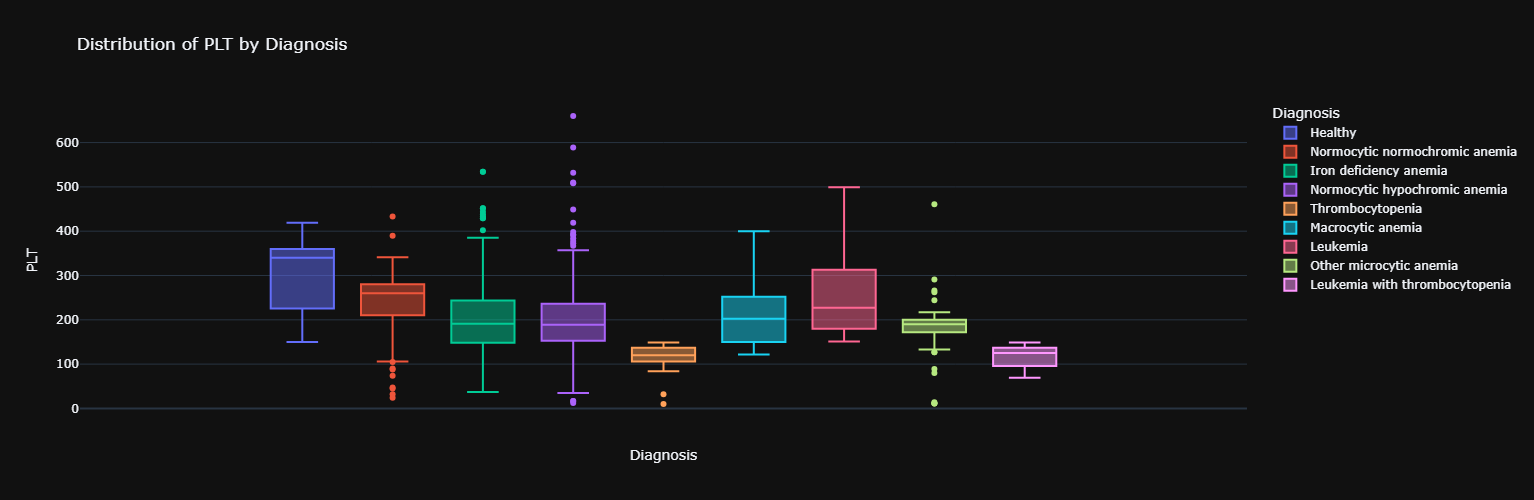

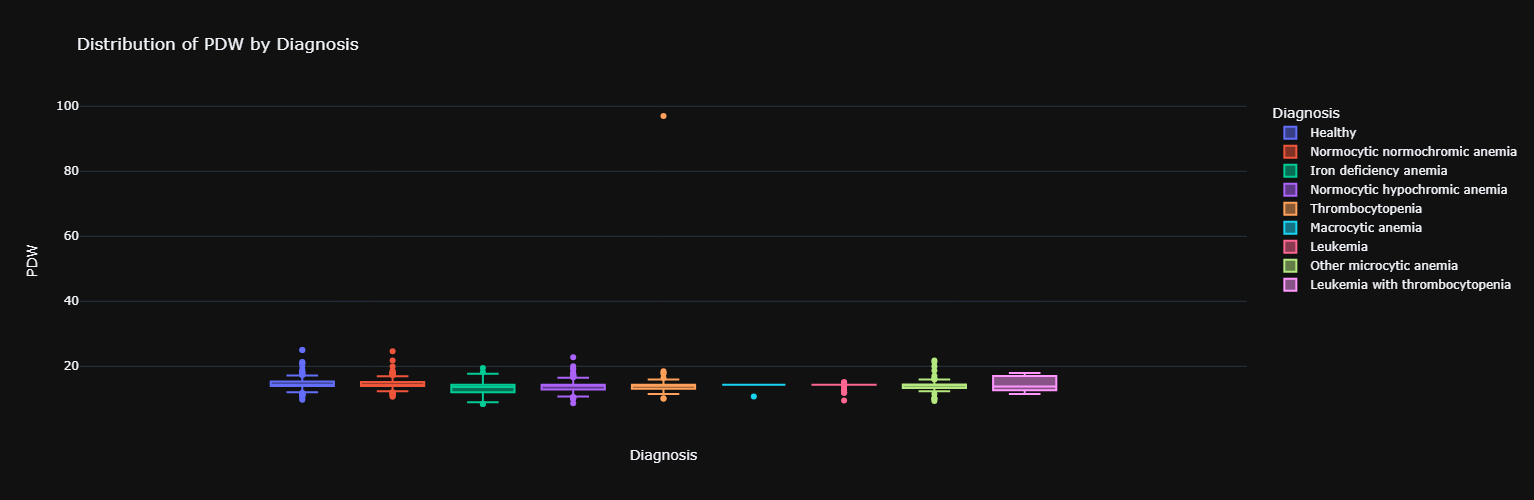

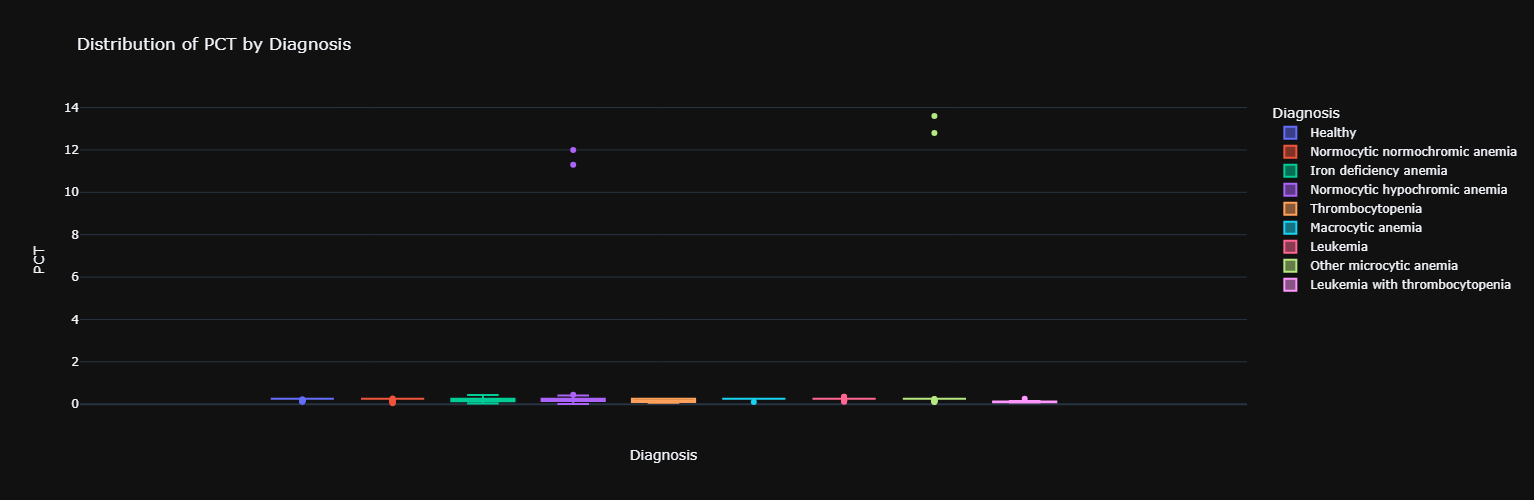

In [25]:
for var in Xtrain.columns:
    plot_box(var)

### Data Preprocessing

In [88]:
# scaling 
from sklearn.preprocessing import RobustScaler

# instantiate a RobustScaler class
scaler = StandardScaler()

# scale the feature matrix of the train and test data
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [82]:
from sklearn.preprocessing import LabelEncoder

# instantiate a LabelEncoder class
encoder = LabelEncoder()

# encoding the target vector of train and test data
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

### Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(class_weight='balanced', random_state=122)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_scaled, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best AUROC: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best AUROC:  0.9882879005260641


In [141]:
# classification report
from sklearn.metrics import classification_report

ypred = best_tree.predict(Xtest_scaled)

report = classification_report(ytest_encoded, ypred, target_names=ytrain.unique(), zero_division=0.0)
print(report)

                                precision    recall  f1-score   support

                       Healthy       1.00      1.00      1.00        67
Normocytic normochromic anemia       0.97      1.00      0.99        38
        Iron deficiency anemia       1.00      1.00      1.00         9
 Normocytic hypochromic anemia       1.00      1.00      1.00         2
              Thrombocytopenia       1.00      1.00      1.00         4
             Macrocytic anemia       1.00      1.00      1.00        56
                      Leukemia       1.00      1.00      1.00        54
       Other microcytic anemia       1.00      0.92      0.96        12
Leukemia with thrombocytopenia       1.00      1.00      1.00        15

                      accuracy                           1.00       257
                     macro avg       1.00      0.99      0.99       257
                  weighted avg       1.00      1.00      1.00       257



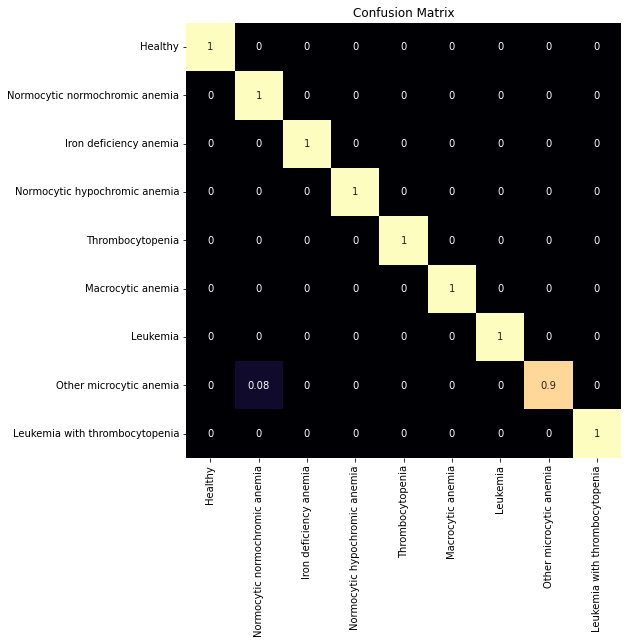

In [139]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest_encoded, ypred, normalize='true')
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap='magma', cbar=False, fmt='.0g', square=True, xticklabels=ytrain.unique(), yticklabels=ytrain.unique())
plt.title('Confusion Matrix')
plt.show()

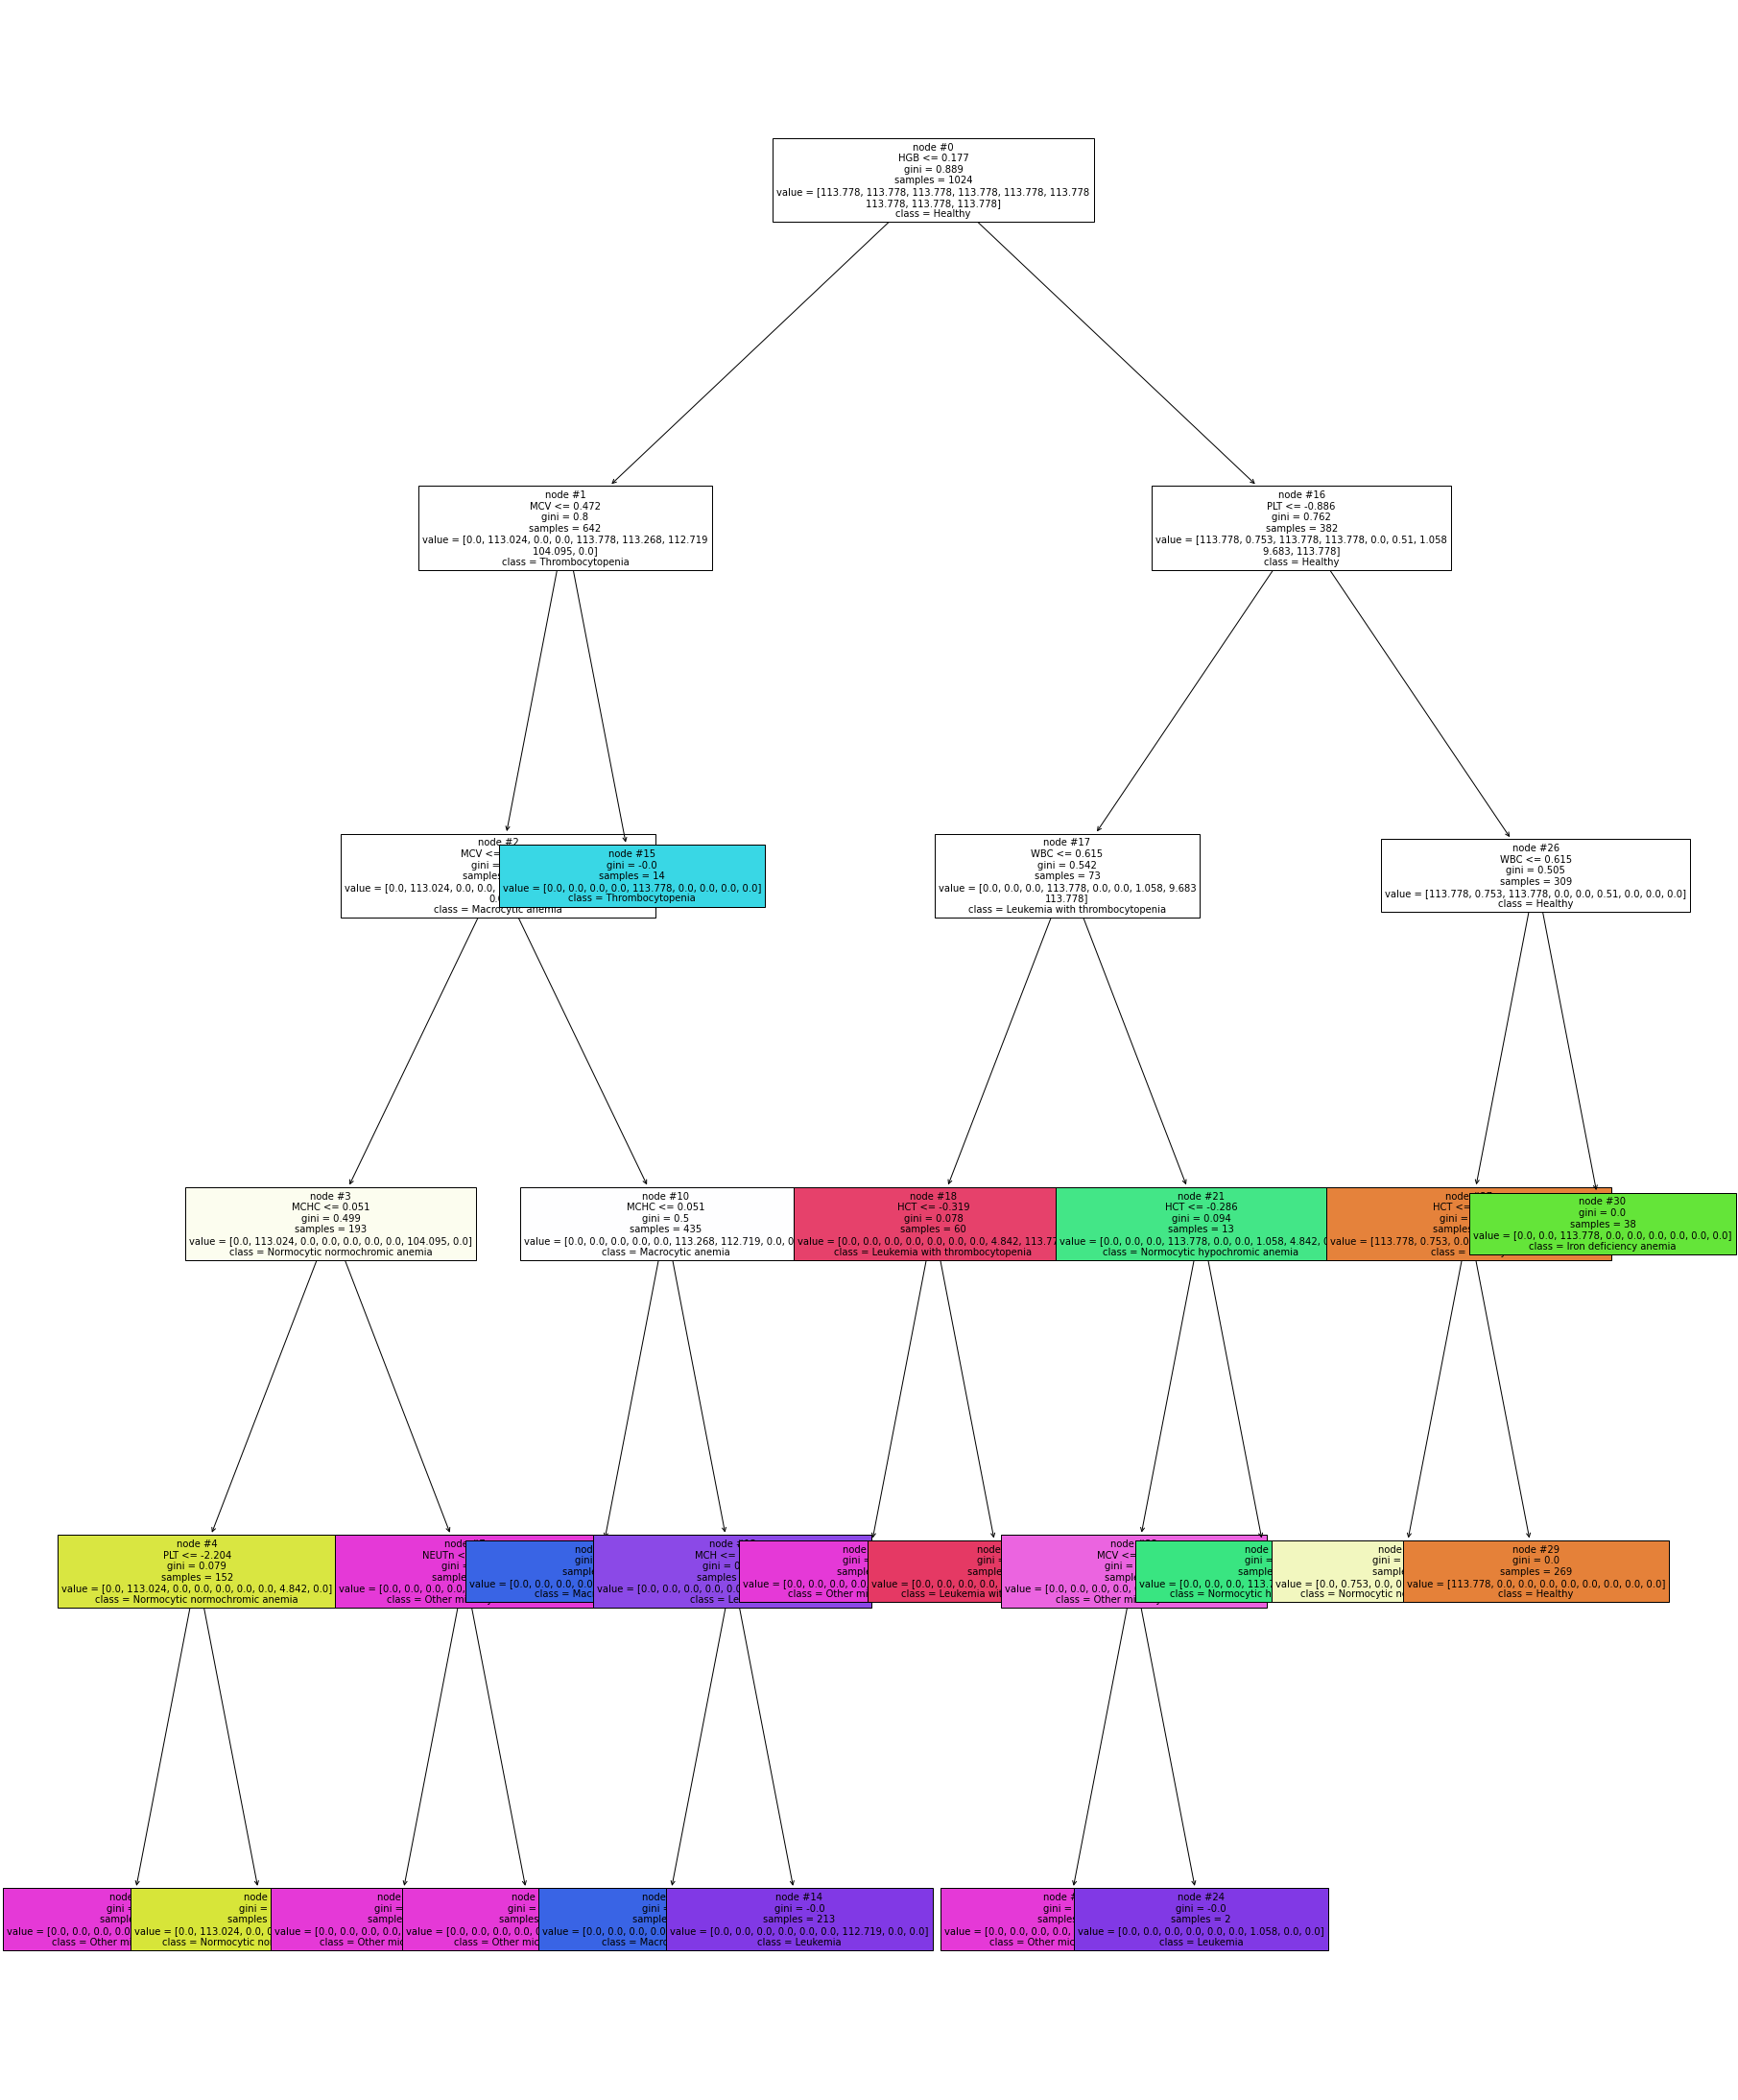

In [154]:
# visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(30,40))
plot_tree(best_tree, feature_names=Xtrain.columns, class_names=ytrain.unique(), label='all', filled=True, node_ids=True, fontsize=10)
plt.show()